In [30]:
📊 TASK 2: EXPLORATORY DATA ANALYSIS (EDA) & BUSINESS INTELLIGENCE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Step 1:Descriptive Statistics & Univariate Analysis
df = pd.read_csv("final_clean_sales_data.csv")
df.head()


,order_id,date,product_id,product_name,price_per_kg,weight_kg,total_sales,year,month,day
0,1,2021-01-01,7,Mango,51,4,204,2021,1,1
1,2,2021-01-01,9,Pineapple,55,10,550,2021,1,1
2,3,2021-01-01,2,Avocado,33,4,132,2021,1,1
3,4,2021-01-02,10,Watermelon,35,4,140,2021,1,2
4,5,2021-01-03,3,Banana,39,7,273,2021,1,3


In [8]:
df.describe()

,order_id,product_id,price_per_kg,weight_kg,total_sales,year,month,day
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.000000
mean,50.500000,6.000000,48.540000,6.460000,316.220000,2021.0,1.0,16.050000
std,29.011492,2.715463,12.889131,2.324312,152.985084,0.0,0.0,8.968379
min,1.000000,1.000000,33.000000,3.000000,105.000000,2021.0,1.0,1.000000
25%,25.750000,4.000000,37.000000,4.000000,204.000000,2021.0,1.0,8.000000
50%,50.500000,6.000000,41.000000,6.500000,275.500000,2021.0,1.0,16.000000
75%,75.250000,8.000000,55.000000,8.000000,408.500000,2021.0,1.0,24.250000
max,100.000000,10.000000,69.000000,10.000000,690.000000,2021.0,1.0,31.000000


In [9]:
df['product_name'].value_counts()


product_name
Orange        13
Mango         12
Pineapple     12
Grapes        12
Avocado       11
Chico         11
Watermelon    10
Cherry         8
Banana         6
Apple          5
Name: count, dtype: int64

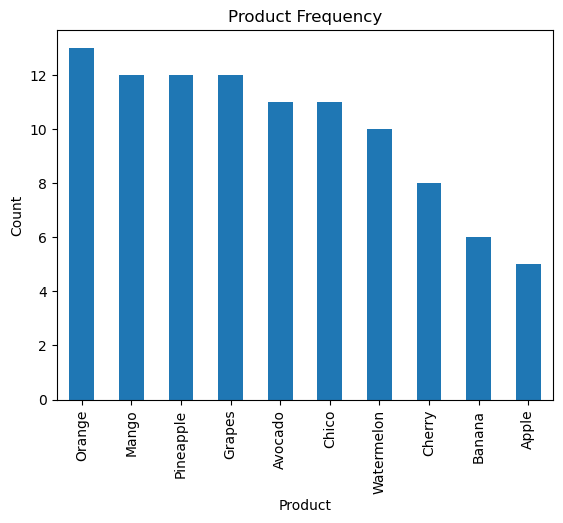

In [10]:
df['product_name'].value_counts().plot(kind='bar')
plt.title("Product Frequency")
plt.xlabel("Product")
plt.ylabel("Count")
plt.show()


In [12]:
import sqlite3

conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)


100

In [ ]:
# Step 2:SQL for business Questions
What are the top 5 products by total revenue?

What is the monthly sales trend?

Which product has the highest average price per kg?

What is the total revenue per year?

Which products sell the highest quantity?

In [15]:
#SQL Queries for above questions
#1)Top 5 products by revenue
query = """
SELECT product_name, SUM(total_sales) AS revenue
FROM sales
GROUP BY product_name
ORDER BY revenue DESC
LIMIT 5;
"""
pd.read_sql(query, conn)


,product_name,revenue
0,Orange,7303
1,Pineapple,4510
2,Chico,4209
3,Grapes,3362
4,Mango,3060


In [16]:
#2)Monthly sales trend 
query = """
SELECT month, SUM(total_sales) AS monthly_sales
FROM sales
GROUP BY month
ORDER BY month;
"""
pd.read_sql(query, conn)


,month,monthly_sales
0,1,31622


In [17]:
#3)Highest average price
query = """
SELECT product_name, AVG(price_per_kg) AS avg_price
FROM sales
GROUP BY product_name
ORDER BY avg_price DESC;
"""
pd.read_sql(query, conn)


,product_name,avg_price
0,Chico,69.0
1,Orange,67.0
2,Pineapple,55.0
3,Mango,51.0
4,Grapes,41.0
5,Cherry,41.0
6,Banana,39.0
7,Apple,37.0
8,Watermelon,35.0
9,Avocado,33.0


In [23]:
#4)Total revenue per year
query = """
SELECT 
    year,
    SUM(total_sales) AS total_revenue
FROM sales
GROUP BY year
ORDER BY year;
"""
pd.read_sql(query, conn)


,year,total_revenue
0,2021,31622


In [25]:
#5)Products with highest quantity sold
query = """
SELECT 
    product_name,
    SUM(weight_kg) AS total_quantity_sold
FROM sales
GROUP BY product_name
ORDER BY total_quantity_sold DESC;
"""
pd.read_sql(query, conn)


,product_name,total_quantity_sold
0,Orange,109
1,Pineapple,82
2,Grapes,82
3,Avocado,75
4,Chico,61
5,Mango,60
6,Watermelon,58
7,Cherry,48
8,Banana,39
9,Apple,32


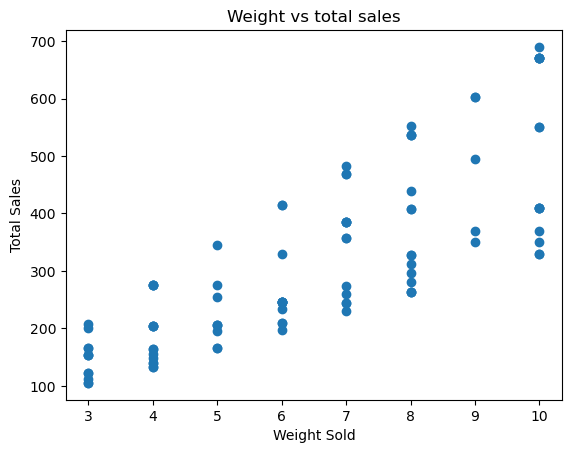

In [27]:
#🔵 Step 3: MULTIVARIATE ANALYSIS & CORRELATION
plt.scatter(df['weight_kg'], df['total_sales'])
plt.xlabel("Weight Sold")
plt.ylabel("Total Sales")
plt.title("Weight vs total sales")
plt.show()


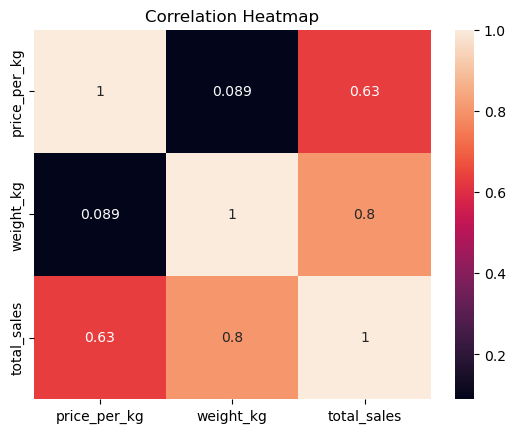

In [31]:
sns.heatmap(df[['price_per_kg', 'weight_kg', 'total_sales']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()
